In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import seaborn as sns

In [4]:
data = pd.read_csv('./yes.csv')
data = data.loc[data["valid"] == True]

In [71]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data["abs_diff"] = (data["eia"] - data['epa']).abs()
data.describe()['abs_diff']

count       126.000
mean     102452.953
std      255584.609
min           0.000
25%        4781.476
50%       18842.000
75%       75714.275
max     2254090.000
Name: abs_diff, dtype: float64

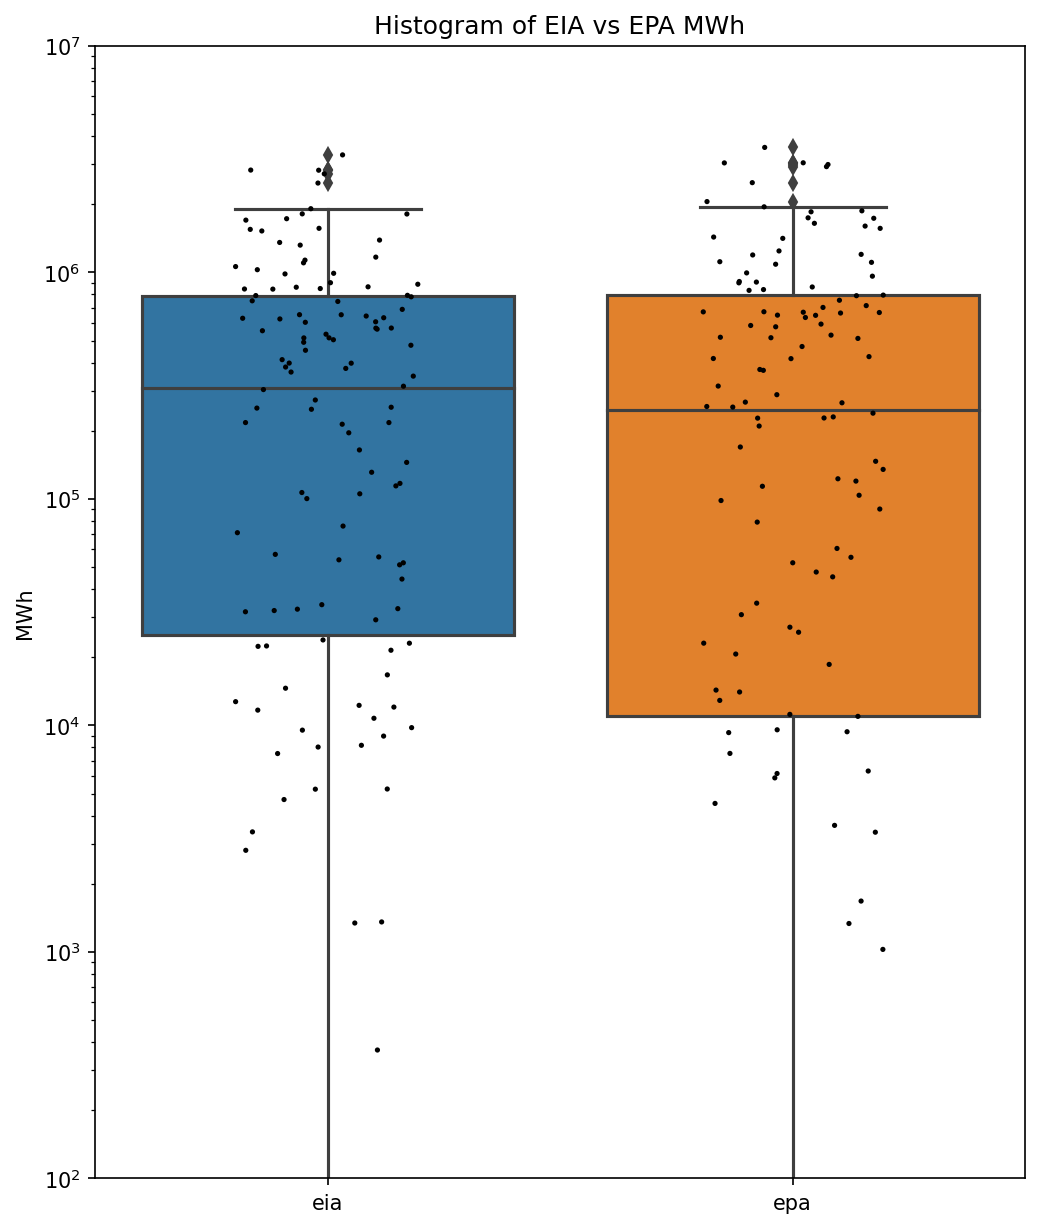

In [74]:
fig, ax = plt.subplots(figsize=(8,10), dpi=150)
ax = sns.boxplot(data=data[["eia", "epa"]])
ax = sns.stripplot(data=data[["eia", "epa"]], color="black", jitter=0.2, size=2.5)
plt.title("Histogram of EIA vs EPA MWh")
plt.ylabel("MWh")
plt.yscale("log")
plt.ylim(10**2, 10**7)
plt.savefig('boxplot.png')

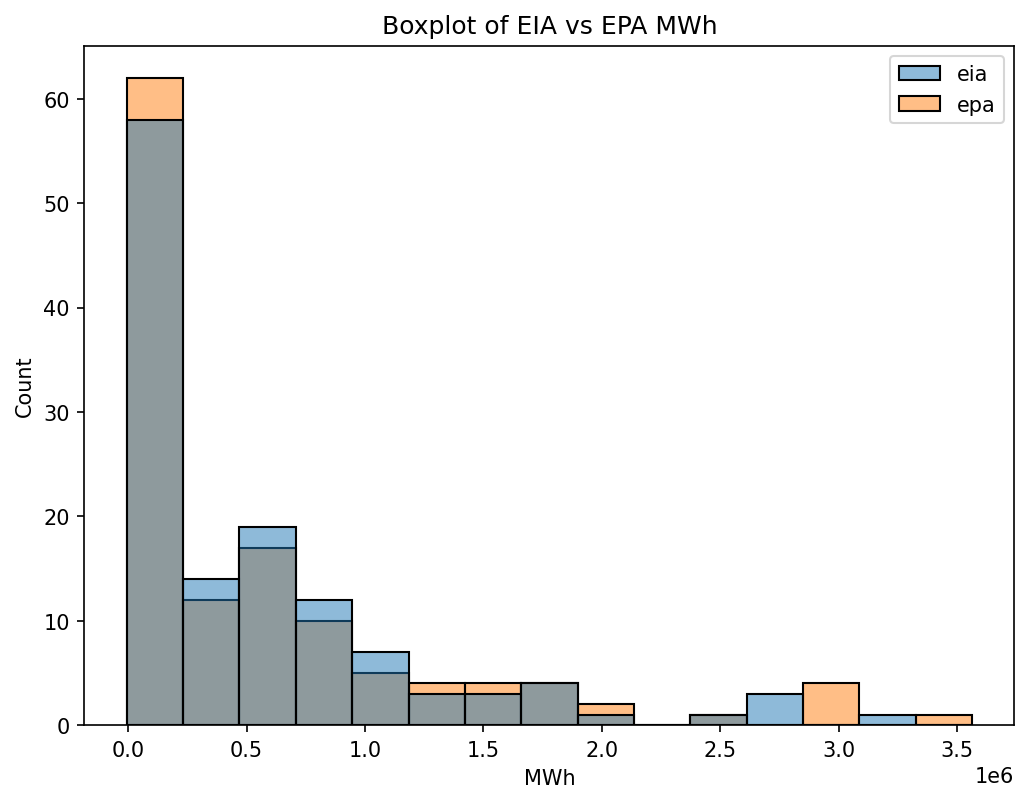

In [75]:
fig, ax = plt.subplots(figsize=(8,6), dpi=150)
ax = sns.histplot(data=data[["eia", "epa"]])
plt.title("Boxplot of EIA vs EPA MWh")
plt.xlabel("MWh")
plt.savefig('hist.png')